In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:

train = pd.read_csv("./digit-recognizer/train.csv")
test = pd.read_csv("./digit-recognizer/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train=train.drop(labels = ["label"],axis = 1) 
Y_train=train['label']
print(X_train.shape)
print(Y_train.shape)

(42000, 784)
(42000,)


In [7]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
X_train=X_train.astype('float32')/255
test=test.astype('float32')/255

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
X_train.shape

(42000, 28, 28, 1)

In [11]:
test.shape

(28000, 28, 28, 1)

###  2.4 Label Encoding

In [12]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
Y_train.shape

(42000, 10)

In [14]:
print(Y_train[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**  2.5 Now we will split training data into training data and validation data **

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

In [44]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[1][:,:,0])
plt.title(Y_train[1].argmax());

IndexError: index 2 is out of bounds for axis 2 with size 1

<Figure size 432x432 with 0 Axes>

## 3.  Building CNN architecture using keras

### 3.1 Defining cnn model

In [17]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [18]:
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)



x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation = 'softmax',name='fc2')(x)

model = Model(inputs = input,outputs = x,name='Predict')


In [19]:
model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256 

## 3.2 Data Augmentation

```
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally 
    height_shift_range=0.2,# randomly shift images vertically 
    
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)
```

## 3.3 optimizer 

In [20]:
# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [21]:
import math
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]


In [23]:
history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
                          epochs=10,callbacks=callbacks_list,verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 138s 4ms/step - loss: 0.3147 - accuracy: 0.9087 - val_loss: 0.1269 - val_accuracy: 0.9657
Epoch 2/10
37800/37800 [==============================] - 132s 4ms/step - loss: 0.1330 - accuracy: 0.9653 - val_loss: 0.0710 - val_accuracy: 0.9814
Epoch 3/10
37800/37800 [==============================] - 133s 4ms/step - loss: 0.0791 - accuracy: 0.9794 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 4/10
37800/37800 [==============================] - 134s 4ms/step - loss: 0.0658 - accuracy: 0.9830 - val_loss: 0.0495 - val_accuracy: 0.9883
Epoch 5/10
37800/37800 [==============================] - 135s 4ms/step - loss: 0.0569 - accuracy: 0.9847 - val_loss: 0.0422 - val_accuracy: 0.9907
Epoch 6/10
37800/37800 [==============================] - 136s 4ms/step - loss: 0.0433 - accuracy: 0.9881 - val_loss: 0.0428 - val_accuracy: 0.9886
Epoch 7/10
37800/37800 [==============================] - 136s 

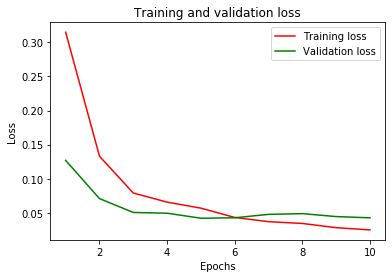

In [24]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
history.history

{'val_loss': [0.12691194099489145,
  0.07095346777832934,
  0.05061827785861169,
  0.04953937728942211,
  0.04217957394480566,
  0.04284884445348455,
  0.04783340465738071,
  0.04891082486793168,
  0.04459264216693988,
  0.04277183999582944],
 'val_accuracy': [0.9657142758369446,
  0.9814285635948181,
  0.9859523773193359,
  0.9883333444595337,
  0.9907143115997314,
  0.9885714054107666,
  0.9892857074737549,
  0.9885714054107666,
  0.9900000095367432,
  0.9902380704879761],
 'loss': [0.31466835184702796,
  0.1329636271409789,
  0.07909906600560086,
  0.06576290285436526,
  0.05692119057505224,
  0.043319013476539305,
  0.037136923851619014,
  0.03450723604779572,
  0.028344911686830017,
  0.025056001648921106],
 'accuracy': [0.9086772,
  0.96526456,
  0.979418,
  0.98298943,
  0.9847354,
  0.9881217,
  0.9901323,
  0.9903968,
  0.9925661,
  0.99291],
 'lr': [0.1, 0.1, 0.06, 0.06, 0.06, 0.036, 0.036, 0.036, 0.0216, 0.0216]}

## 4.2 plotting training and validation accuracy

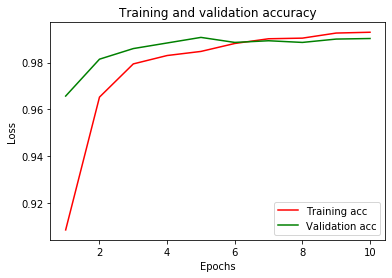

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
print("on valid data")
pred1=model.evaluate(X_valid,Y_valid)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

on valid data
4200/4200 [==============================] - 5s 1ms/step
accuaracy 99.02380704879761
Total loss 4.2771839995829435


## Visualize CNN Layers

In [78]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[15].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [41]:
model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256 

### Displaying original Image

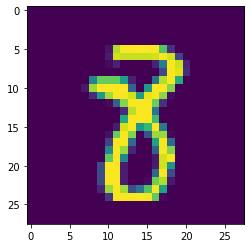

In [76]:
plt.imshow(X_train[15][:,:,0]);

### Desplaying above image after layer 2 .
** layer 1 is input layer **.

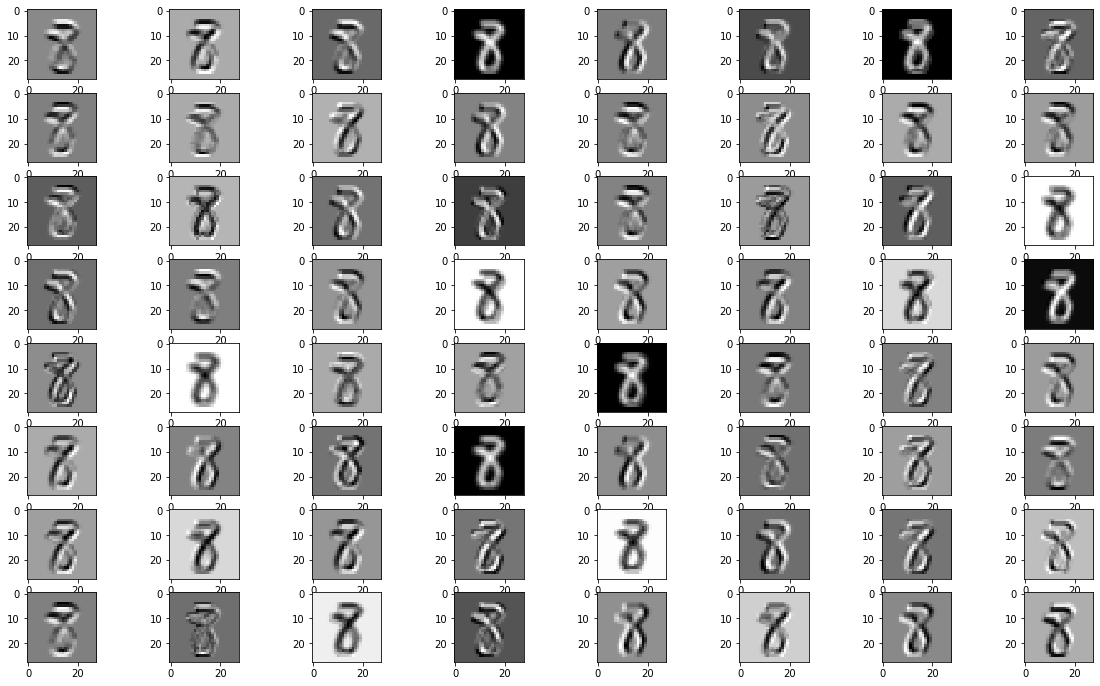

In [79]:
display_activation(activations, 8, 8, 1)

### Displaying output of layer 4

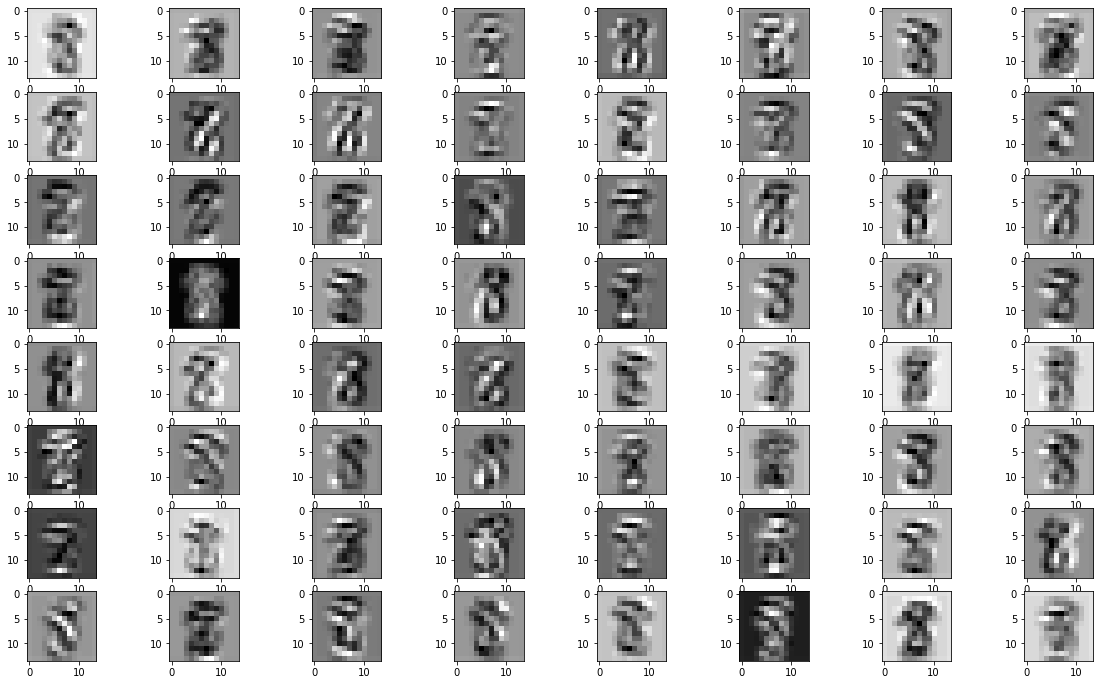

In [80]:
display_activation(activations, 8, 8, 5)

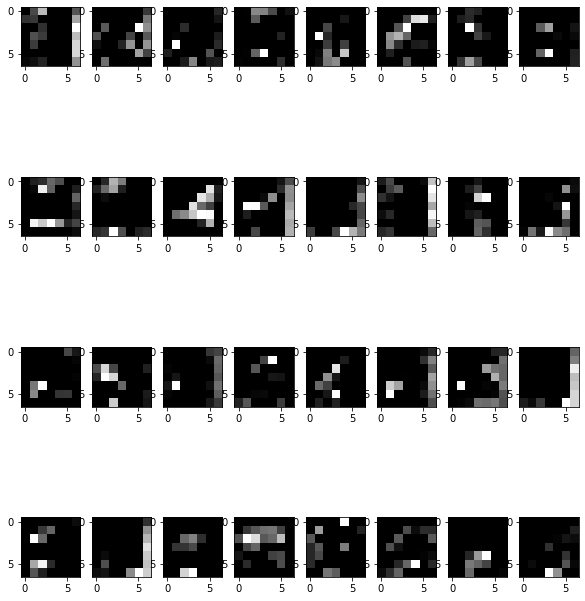

In [83]:
a0 = display_activation(activations, 8, 4, 11)

In [49]:
model.predict(X_train[10].reshape(-1,28,28,1))

array([[1.9147580e-08, 1.1287001e-12, 1.9331543e-15, 1.4099504e-17,
        7.3589555e-12, 3.7840287e-08, 1.0000000e+00, 6.0618537e-18,
        1.2964867e-09, 4.6161212e-14]], dtype=float32)

In [63]:
X_train.shape

(37800, 28, 28, 1)

In [67]:
from PIL import Image
import glob

image_list = glob.glob('./triangles/*.png')
x = np.array([np.array(Image.open(fname).convert('L')) for fname in image_list])

In [77]:
model.predict(x[10].reshape(1,28,28,1))

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [70]:
activations1 = activation_model.predict(x[10].reshape(1,28,28,1))

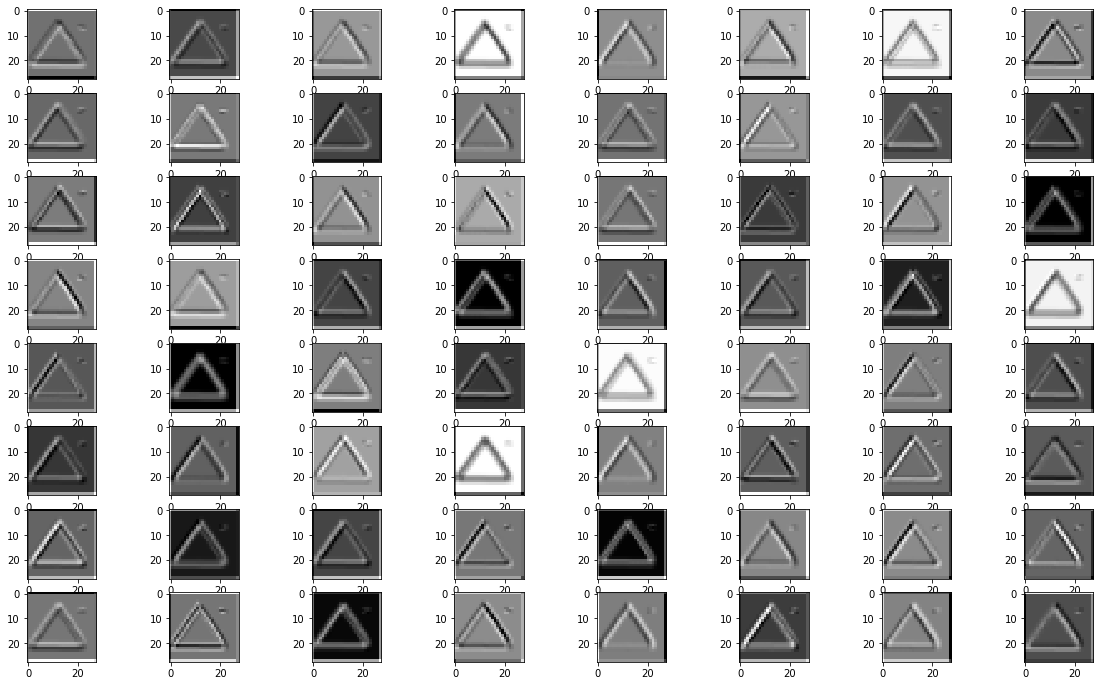

In [71]:
display_activation(activations1, 8, 8, 1)

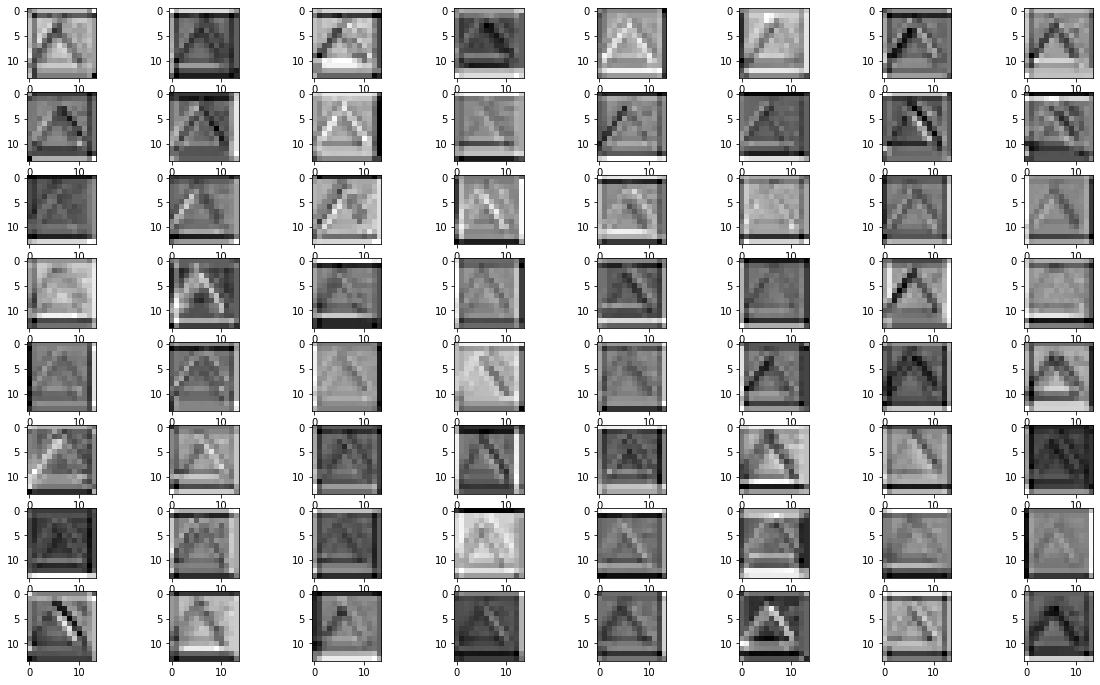

In [72]:
display_activation(activations1, 8, 8, 5)

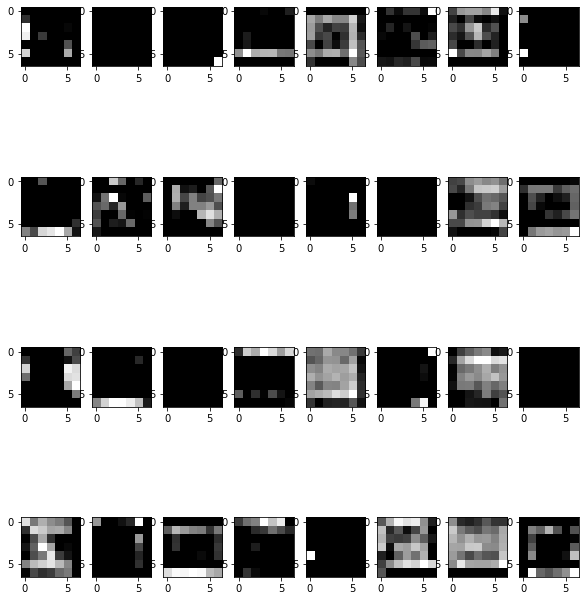

In [84]:
a1 = display_activation(activations1, 8, 4, 11)